In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"Test_data_analysis/NEW_MODIFICATION/Train_data/master_data.xlsx")
df_test = pd.read_excel(r"Test_data_analysis/NEW_MODIFICATION/Test_data/Batches/final_test.xlsx")

In [3]:
df.shape

(1787, 92)

In [4]:
df.head(3)

,SRN,createdondate,materialdescription,CaseId,Total_Unique_Days,Coil_A_Unique_Days,Coil_B_Unique_Days,Coil_A_Unique_Days_Failed,Coil_B_Unique_Days_Failed,Total_Unique_Days_Failed,...,Coil_XPRCIM24_NotConfigured,Coil_MALFNOTOP_NotConfigured,Voltage_Error,Coil_A_VERIFICATION_OK_IMAGE,Coil_A_VERIFICATION_OK_SCAN,Coil_B_VERIFICATION_OK_IMAGE,Coil_B_VERIFICATION_OK_SCAN,Replaced,caseopendate,caseclosedate
0,22086,2020-01-06,"FRU, PHILIPS 1.5T 16CH SNVC",5000L00001OJKq3QAH,0,0,0,0,0,0,...,0,0,[['null']],[[]],[[]],[[]],[[]],0,NaT,2019-12-04
1,21225,2020-01-07,"FRU, PHILIPS 1.5T 16CH SNVC",5000L00001PaDVqQAN,0,0,0,0,0,0,...,0,0,[['-5 Volt A dip']],[[]],[[]],[[]],[[]],0,NaT,2020-01-07
2,30188,2020-01-09,"FRU, 1.5T NVA PMS",5000L00001OIOL4QAP,0,0,0,0,0,0,...,0,0,[['null']],[[]],[[]],[[]],[[]],0,NaT,2020-01-09


In [5]:
df_test.head(3)

,Unnamed: 0,SRN,LogDate,HWErrorMessage,Connection,Error_class,d2,failedcause,status,Total_Unique_Days,...,Coil_B_MALFNOTOP_NotConfigured,Coil_3507_NotConfigured,Coil_3508_NotConfigured,Coil_XPRCIM24_NotConfigured,Coil_MALFNOTOP_NotConfigured,Voltage_Error,Coil_A_VERIFICATION_OK_IMAGE,Coil_A_VERIFICATION_OK_SCAN,Coil_B_VERIFICATION_OK_IMAGE,Coil_B_VERIFICATION_OK_SCAN
0,0,5243,2021-02-15,"[Scanner, , 3507, Coil A failure, coil disconn...",A,3507,2021-02-15 15:55:49.210,Interlock,Failed,1,...,0,0,0,0,0,[[]],"[['OK', 'OK', 'OK', 'NOT OK', 'NOT OK']]","[['OK', 'OK', 'OK', 'NOT OK', 'NOT OK']]","[['NOT OK', 'OK', 'OK', 'OK', 'NOT OK', 'OK']]","[['NOT OK', 'OK', 'OK', 'OK', 'NOT OK', 'OK']]"
1,1,5243,2021-03-22,"[Scanner, , 3507, Coil A failure, coil disconn...",A,3507,2021-03-22 12:30:00.360,Interlock,Failed,2,...,0,0,0,0,0,[[]],"[['OK', 'OK', 'OK', 'NOT OK', 'NOT OK']]","[['OK', 'OK', 'OK', 'NOT OK', 'NOT OK']]","[['NOT OK', 'OK', 'OK', 'OK', 'NOT OK', 'OK']]","[['NOT OK', 'OK', 'OK', 'OK', 'NOT OK', 'OK']]"
2,2,5243,2021-03-22,"[Scanner, , 3507, Coil A failure, coil disconn...",A,3507,2021-03-22 12:32:58.810,Interlock,Failed,2,...,0,0,0,0,0,[[]],"[['OK', 'OK', 'OK', 'NOT OK', 'NOT OK']]","[['OK', 'OK', 'OK', 'NOT OK', 'NOT OK']]","[['NOT OK', 'OK', 'OK', 'OK', 'NOT OK', 'OK']]","[['NOT OK', 'OK', 'OK', 'OK', 'NOT OK', 'OK']]"


In [6]:
df.shape

(1787, 92)

In [7]:
df_test.shape

(44707, 94)

In [8]:
df_2022 = df[(df['createdondate']>='2022-01-01')]
df_2020 = df[(df['createdondate']>='2020-01-02') & (df['createdondate'] <= '2020-12-31')]
df = df_2022.append(df_2020)

In [9]:
df_test = df_test[(df_test["LogDate"] >= '2021-01-01') & (df_test["LogDate"] <= '2021-12-31')]

In [10]:
df.shape

(1049, 92)

In [11]:
df_test.shape

(44707, 94)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 397 to 1603
Data columns (total 92 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   SRN                                         1049 non-null   int64         
 1   createdondate                               1049 non-null   datetime64[ns]
 2   materialdescription                         1049 non-null   object        
 3   CaseId                                      1049 non-null   object        
 4   Total_Unique_Days                           1049 non-null   int64         
 5   Coil_A_Unique_Days                          1049 non-null   int64         
 6   Coil_B_Unique_Days                          1049 non-null   int64         
 7   Coil_A_Unique_Days_Failed                   1049 non-null   int64         
 8   Coil_B_Unique_Days_Failed                   1049 non-null   int64         
 9   Total_

In [13]:
df['Total_Scan'] = df['Total_Scan'].apply(lambda x : x.strip('][').split(', '))
df['Total_Scan'] = df['Total_Scan'].apply(lambda x : int(x[0]))
#df_test['Total_Scan'] = df_test['Total_Scan'].apply(lambda x : x.strip('][').split(', '))
#df_test['Total_Scan'] = df_test['Total_Scan'].apply(lambda x : int(x[0]))

In [14]:
#df_test.to_excel(r"Test_data_analysis/NEW_MODIFICATION/Test_data/Batches/final_test.xlsx")

In [15]:
df_1 = df[df['Total_Scan'] >=1]
df_test = df_test[df_test['Total_Scan'] >=1]


In [16]:
df_test.shape

(44603, 94)

# Feature Engineering

To drop "SRN","CaseId","Voltage_Error", "Coil_A_VERIFICATION_OK_IMAGE"                       
 "Coil_A_VERIFICATION_OK_SCAN",                         
 "Coil_B_VERIFICATION_OK_IMAGE"                        
 "Coil_B_VERIFICATION_OK_SCAN"
 "materialdescription"
 
 as it is not at all relevant.

In [17]:
df_2 = df_1.drop(["SRN","CaseId","Voltage_Error","Coil_A_VERIFICATION_OK_IMAGE","Coil_A_VERIFICATION_OK_SCAN","Coil_B_VERIFICATION_OK_IMAGE","Coil_B_VERIFICATION_OK_SCAN","materialdescription"],axis = 1)
df_test = df_test.drop(["SRN","Voltage_Error","Coil_A_VERIFICATION_OK_IMAGE","Coil_A_VERIFICATION_OK_SCAN","Coil_B_VERIFICATION_OK_IMAGE","Coil_B_VERIFICATION_OK_SCAN"],axis = 1)

### one hot encoding for "material description"

In [18]:
'''one_hot_encoded_data = pd.get_dummies(df_2, columns = ['materialdescription'])
one_hot_encoded_data.head(2)'''

"one_hot_encoded_data = pd.get_dummies(df_2, columns = ['materialdescription'])\none_hot_encoded_data.head(2)"

In [19]:
'''df_3 = one_hot_encoded_data
df_3.shape'''

'df_3 = one_hot_encoded_data\ndf_3.shape'

# Feature Selection

### Variance threshold elimination

As variance threshold required same dtype inputs,in this we will drop features having zero variance or features which are constant

In [20]:
df_4 = df_2
df_4 = df_4.drop(["createdondate","caseclosedate","caseopendate"],axis = 1)
df_test = df_test.drop(["LogDate","HWErrorMessage","Connection","Error_class","d2","failedcause","status"],axis = 1)

In [21]:
df_4.columns

Index(['Total_Unique_Days', 'Coil_A_Unique_Days', 'Coil_B_Unique_Days',
       'Coil_A_Unique_Days_Failed', 'Coil_B_Unique_Days_Failed',
       'Total_Unique_Days_Failed',
       'Total_Common_InBothConn_Unique_Days_Failed',
       'Coil_A_Unique_Days_Normal', 'Coil_B_Unique_Days_Normal',
       'Total_Unique_Days_Normal',
       'Total_Common_InBothConn_Unique_Days_Normal', 'Total_Scan',
       'Coil_A_Total_Scan', 'Coil_B_Total_Scan', 'Coil_A_Errors',
       'Coil_B_Errors', 'Total_Errors_AllCoil', 'Coil_A_Normal',
       'Coil_B_Normal', 'Total_Normal_AllCoil', 'Failed_Scan_TO_Total_Scan',
       'Normal_Scan_TO_Total_Scan', 'Failed_Scan_TO_Normal_Scan',
       'Coil_A_Interlock', 'Coil_A_Malfunction', 'Coil_A_NotConfigured',
       'Coil_B_Interlock', 'Coil_B_Malfunction', 'Coil_B_NotConfigured',
       'Interlock', 'Malfunction', 'NotConfigured', 'Coil_A_3507',
       'Coil_A_3508', 'Coil_A_XPRCIM24', 'Coil_A_MALFNOTOP', 'Coil_B_3507',
       'Coil_B_3508', 'Coil_B_XPRCIM24', 'Coi

In [22]:
df_test.columns

Index(['Unnamed: 0', 'Total_Unique_Days', 'Coil_A_Unique_Days',
       'Coil_B_Unique_Days', 'Coil_A_Unique_Days_Failed',
       'Coil_B_Unique_Days_Failed', 'Total_Unique_Days_Failed',
       'Total_Common_InBothConn_Unique_Days_Failed',
       'Coil_A_Unique_Days_Normal', 'Coil_B_Unique_Days_Normal',
       'Total_Unique_Days_Normal',
       'Total_Common_InBothConn_Unique_Days_Normal', 'Total_Scan',
       'Coil_A_Total_Scan', 'Coil_B_Total_Scan', 'Coil_A_Errors',
       'Coil_B_Errors', 'Total_Errors_AllCoil', 'Coil_A_Normal',
       'Coil_B_Normal', 'Total_Normal_AllCoil', 'Failed_Scan_TO_Total_Scan',
       'Normal_Scan_TO_Total_Scan', 'Failed_Scan_TO_Normal_Scan',
       'Coil_A_Interlock', 'Coil_A_Malfunction', 'Coil_A_NotConfigured',
       'Coil_B_Interlock', 'Coil_B_Malfunction', 'Coil_B_NotConfigured',
       'Interlock', 'Malfunction', 'NotConfigured', 'Coil_A_3507',
       'Coil_A_3508', 'Coil_A_XPRCIM24', 'Coil_A_MALFNOTOP', 'Coil_B_3507',
       'Coil_B_3508', 'Coil_B_X

In [23]:
df_4.shape,df_test.shape

((427, 81), (44603, 81))

In [24]:
df_4["Failed_Scan_TO_Total_Scan"] = df_4["Failed_Scan_TO_Total_Scan"].astype(int)
df_4["Normal_Scan_TO_Total_Scan"] = df_4["Normal_Scan_TO_Total_Scan"].astype(int)
df_4["Failed_Scan_TO_Normal_Scan"] = df_4["Failed_Scan_TO_Total_Scan"].astype(int)

df_test["Failed_Scan_TO_Total_Scan"] = df_test["Failed_Scan_TO_Total_Scan"].astype(int)
df_test["Normal_Scan_TO_Total_Scan"] = df_test["Normal_Scan_TO_Total_Scan"].astype(int)
df_test["Failed_Scan_TO_Normal_Scan"] = df_test["Failed_Scan_TO_Total_Scan"].astype(int)

In [25]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df_4)

VarianceThreshold(threshold=0)

In [26]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False, False,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True])

In [27]:
df_4.columns[var_thres.get_support()]

Index(['Total_Unique_Days', 'Coil_A_Unique_Days', 'Coil_B_Unique_Days',
       'Coil_A_Unique_Days_Failed', 'Coil_B_Unique_Days_Failed',
       'Total_Unique_Days_Failed',
       'Total_Common_InBothConn_Unique_Days_Failed',
       'Coil_A_Unique_Days_Normal', 'Coil_B_Unique_Days_Normal',
       'Total_Unique_Days_Normal',
       'Total_Common_InBothConn_Unique_Days_Normal', 'Total_Scan',
       'Coil_A_Total_Scan', 'Coil_B_Total_Scan', 'Coil_A_Errors',
       'Coil_B_Errors', 'Total_Errors_AllCoil', 'Coil_A_Normal',
       'Coil_B_Normal', 'Total_Normal_AllCoil', 'Failed_Scan_TO_Total_Scan',
       'Normal_Scan_TO_Total_Scan', 'Failed_Scan_TO_Normal_Scan',
       'Coil_A_Interlock', 'Coil_B_Interlock', 'Interlock', 'Coil_A_3507',
       'Coil_A_XPRCIM24', 'Coil_A_MALFNOTOP', 'Coil_B_3508', 'Coil_B_XPRCIM24',
       'Coil_B_MALFNOTOP', '3507', '3508', 'XPRCIM24', 'MALFNOTOP',
       'Coil_A_3507_Interlock', 'Coil_A_MALFNOTOP_Interlock',
       'Coil_B_3508_Interlock', 'Coil_B_XPRCIM24_

In [28]:
constant_columns = [column for column in df_4.columns
                    if column not in df_4.columns[var_thres.get_support()]]

print("total number of constant columns are",len(constant_columns))

total number of constant columns are 35


In [29]:
for feature in constant_columns:
     print("features which are constant and to be removed is ",feature)

features which are constant and to be removed is  Coil_A_Malfunction
features which are constant and to be removed is  Coil_A_NotConfigured
features which are constant and to be removed is  Coil_B_Malfunction
features which are constant and to be removed is  Coil_B_NotConfigured
features which are constant and to be removed is  Malfunction
features which are constant and to be removed is  NotConfigured
features which are constant and to be removed is  Coil_A_3508
features which are constant and to be removed is  Coil_B_3507
features which are constant and to be removed is  Coil_A_3508_Interlock
features which are constant and to be removed is  Coil_A_XPRCIM24_Interlock
features which are constant and to be removed is  Coil_B_3507_Interlock
features which are constant and to be removed is  Coil_A_3507_Malfunction
features which are constant and to be removed is  Coil_A_3508_Malfunction
features which are constant and to be removed is  Coil_A_XPRCIM24_Malfunction
features which are const

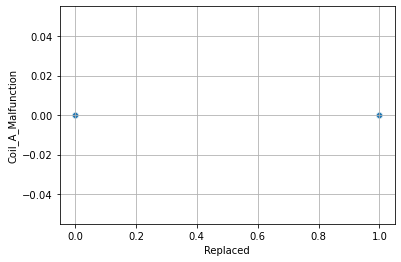

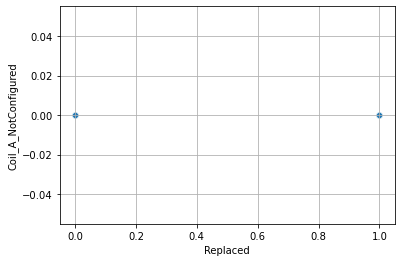

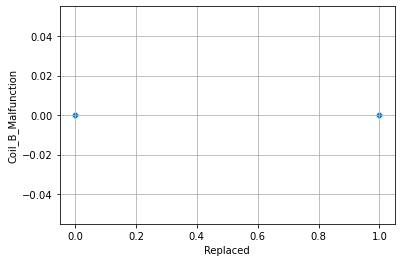

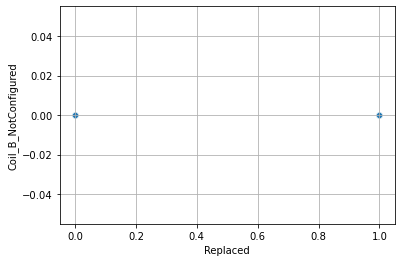

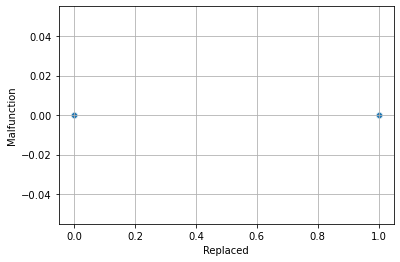

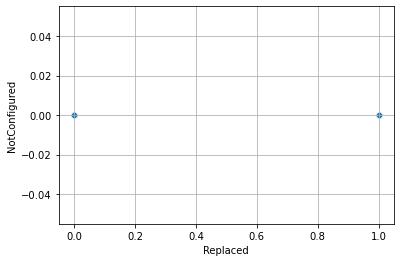

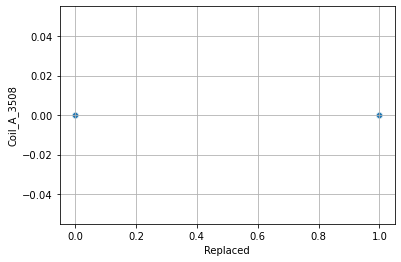

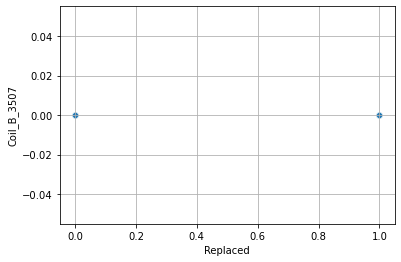

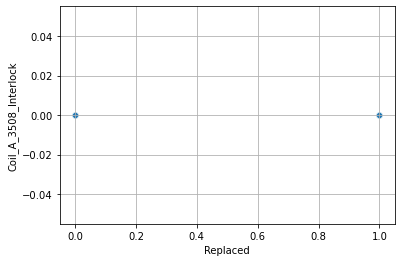

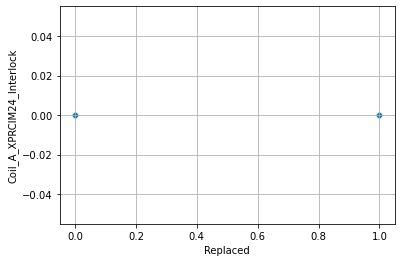

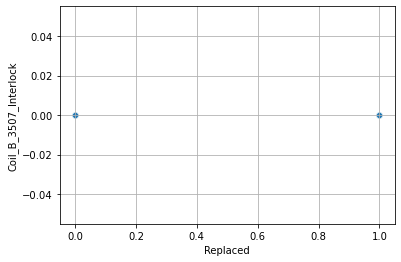

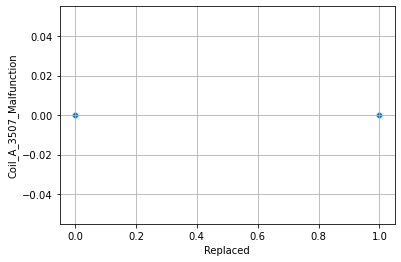

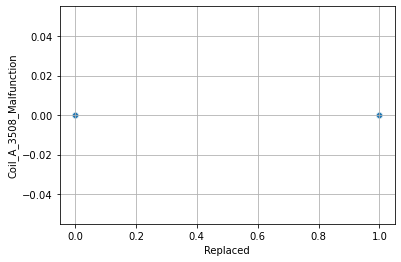

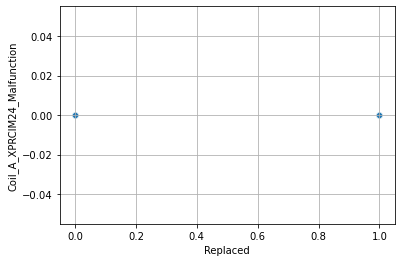

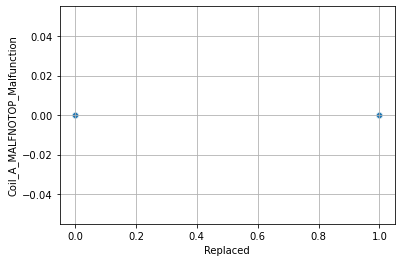

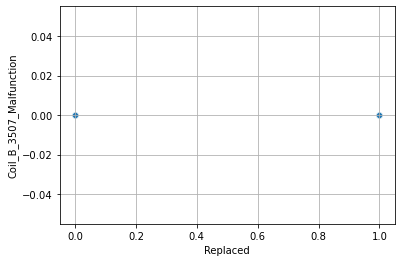

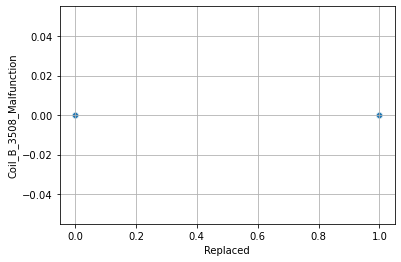

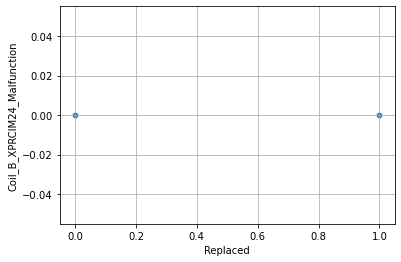

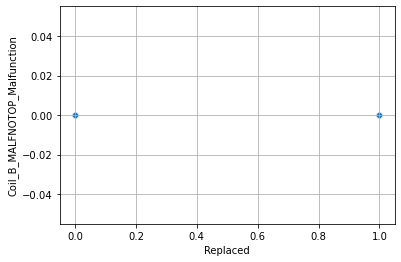

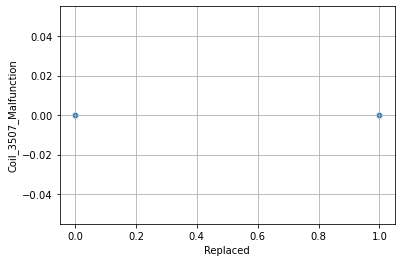

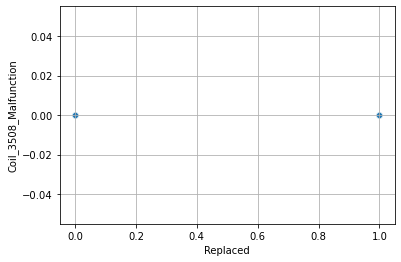

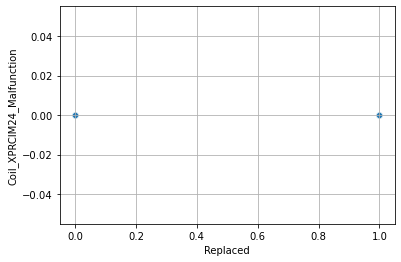

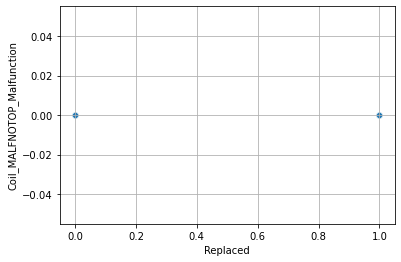

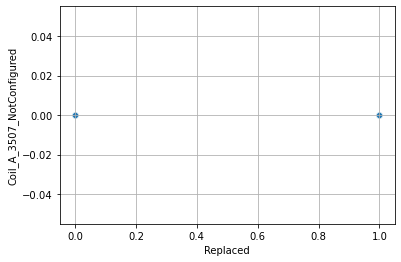

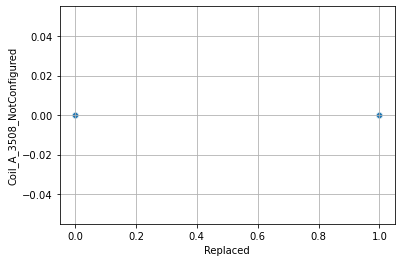

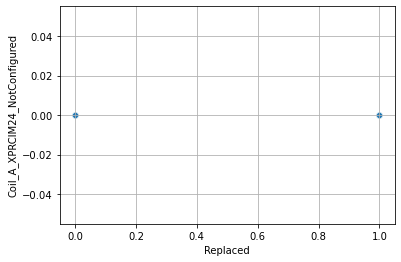

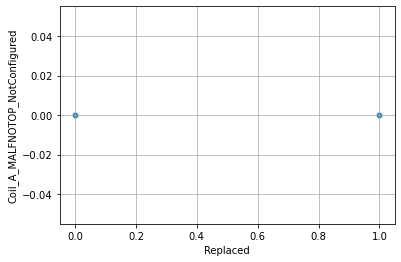

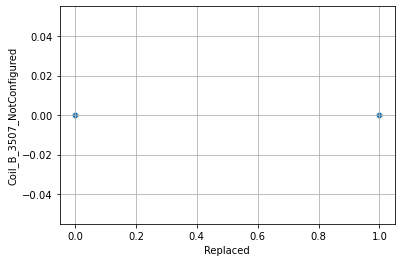

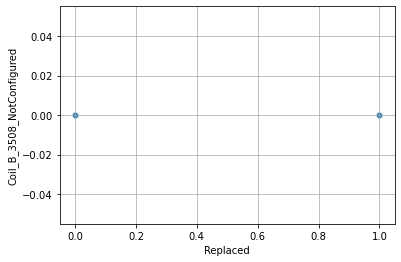

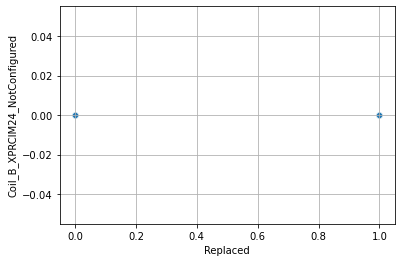

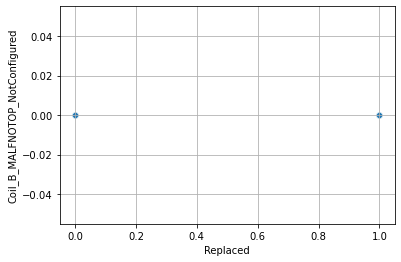

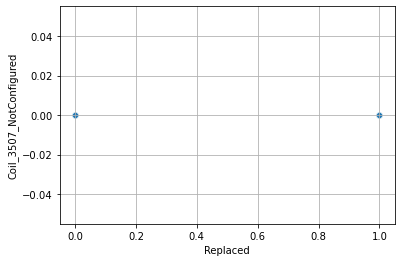

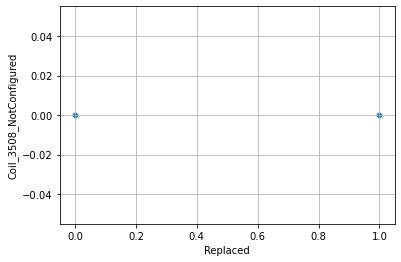

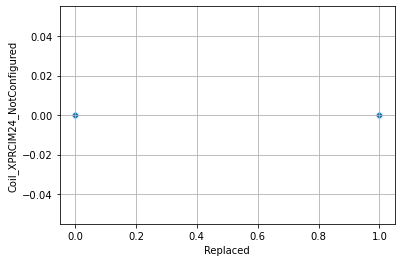

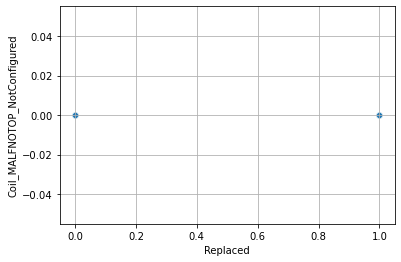

<Figure size 432x288 with 0 Axes>

In [30]:
#plotting
import seaborn as sns
for i in constant_columns:
    sns.scatterplot(x = df_4["Replaced"],y = df_4[i])
    plt.grid()
    plt.figure()
    

In [31]:
df_5 = df_4.drop(constant_columns,axis=1)
df_test = df_test.drop(constant_columns,axis=1)


In [32]:
df_5.columns

Index(['Total_Unique_Days', 'Coil_A_Unique_Days', 'Coil_B_Unique_Days',
       'Coil_A_Unique_Days_Failed', 'Coil_B_Unique_Days_Failed',
       'Total_Unique_Days_Failed',
       'Total_Common_InBothConn_Unique_Days_Failed',
       'Coil_A_Unique_Days_Normal', 'Coil_B_Unique_Days_Normal',
       'Total_Unique_Days_Normal',
       'Total_Common_InBothConn_Unique_Days_Normal', 'Total_Scan',
       'Coil_A_Total_Scan', 'Coil_B_Total_Scan', 'Coil_A_Errors',
       'Coil_B_Errors', 'Total_Errors_AllCoil', 'Coil_A_Normal',
       'Coil_B_Normal', 'Total_Normal_AllCoil', 'Failed_Scan_TO_Total_Scan',
       'Normal_Scan_TO_Total_Scan', 'Failed_Scan_TO_Normal_Scan',
       'Coil_A_Interlock', 'Coil_B_Interlock', 'Interlock', 'Coil_A_3507',
       'Coil_A_XPRCIM24', 'Coil_A_MALFNOTOP', 'Coil_B_3508', 'Coil_B_XPRCIM24',
       'Coil_B_MALFNOTOP', '3507', '3508', 'XPRCIM24', 'MALFNOTOP',
       'Coil_A_3507_Interlock', 'Coil_A_MALFNOTOP_Interlock',
       'Coil_B_3508_Interlock', 'Coil_B_XPRCIM24_

In [33]:
df_5.shape

(427, 46)

# Mutiple techniques to select feature

### 1. To check of multi-collinearity(VIF) and removing features as per correlation

In [34]:
# we will use variance inflation factor to tackle the problem of multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating a function which will give VIF and features seperately

def determine_VIF(dataset):
    vif = pd.DataFrame()
    vif["columns"] = dataset.columns
    vif["VIF"] = [ variance_inflation_factor(dataset.values , i) for i in range(dataset.shape[1])]
    return (vif)

In [35]:
# VIF threshold should be approx 5

vif_values = determine_VIF(df_5)
vif_values

,columns,VIF
0,Total_Unique_Days,302.339873
1,Coil_A_Unique_Days,115.614568
2,Coil_B_Unique_Days,158.542647
3,Coil_A_Unique_Days_Failed,inf
4,Coil_B_Unique_Days_Failed,inf
5,Total_Unique_Days_Failed,inf
6,Total_Common_InBothConn_Unique_Days_Failed,inf
7,Coil_A_Unique_Days_Normal,inf
8,Coil_B_Unique_Days_Normal,inf
9,Total_Unique_Days_Normal,inf


In [36]:
# as we can see that  many have IVF and beyond normal threshold but still checking correlation

### Correlation Analysis

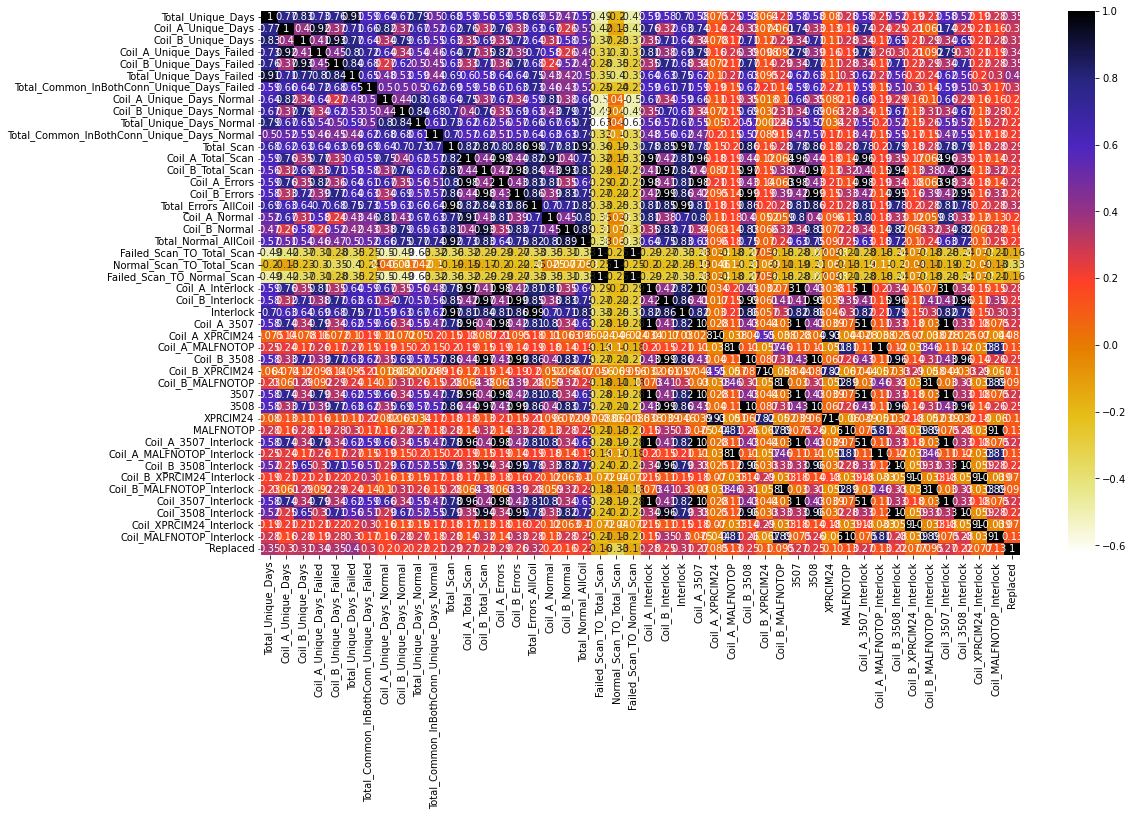

In [37]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(17,10))
cor = df_5.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [38]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with any other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
cor["Replaced"]

Total_Unique_Days                             0.351435
Coil_A_Unique_Days                            0.295766
Coil_B_Unique_Days                            0.313889
Coil_A_Unique_Days_Failed                     0.336526
Coil_B_Unique_Days_Failed                     0.347215
Total_Unique_Days_Failed                      0.402503
Total_Common_InBothConn_Unique_Days_Failed    0.299810
Coil_A_Unique_Days_Normal                     0.195594
Coil_B_Unique_Days_Normal                     0.204718
Total_Unique_Days_Normal                      0.218744
Total_Common_InBothConn_Unique_Days_Normal    0.206955
Total_Scan                                    0.292579
Coil_A_Total_Scan                             0.269586
Coil_B_Total_Scan                             0.230916
Coil_A_Errors                                 0.288952
Coil_B_Errors                                 0.255847
Total_Errors_AllCoil                          0.320851
Coil_A_Normal                                 0.195568
Coil_B_Nor

In [40]:
corr_features = correlation(df_5, 0.8)
len(set(corr_features))

32

In [41]:
corr_features

{'3507',
 '3508',
 'Coil_3507_Interlock',
 'Coil_3508_Interlock',
 'Coil_A_3507',
 'Coil_A_3507_Interlock',
 'Coil_A_Errors',
 'Coil_A_Interlock',
 'Coil_A_MALFNOTOP_Interlock',
 'Coil_A_Normal',
 'Coil_A_Total_Scan',
 'Coil_A_Unique_Days_Failed',
 'Coil_A_Unique_Days_Normal',
 'Coil_B_3508',
 'Coil_B_3508_Interlock',
 'Coil_B_Errors',
 'Coil_B_Interlock',
 'Coil_B_MALFNOTOP_Interlock',
 'Coil_B_Normal',
 'Coil_B_Total_Scan',
 'Coil_B_Unique_Days',
 'Coil_B_Unique_Days_Failed',
 'Coil_MALFNOTOP_Interlock',
 'Coil_XPRCIM24_Interlock',
 'Failed_Scan_TO_Normal_Scan',
 'Interlock',
 'MALFNOTOP',
 'Total_Errors_AllCoil',
 'Total_Normal_AllCoil',
 'Total_Unique_Days_Failed',
 'Total_Unique_Days_Normal',
 'XPRCIM24'}

In [42]:
df_6 = df_5.drop(corr_features,axis=1)

In [43]:
df_6.shape

(427, 14)

In [44]:
df_6.columns

Index(['Total_Unique_Days', 'Coil_A_Unique_Days',
       'Total_Common_InBothConn_Unique_Days_Failed',
       'Coil_B_Unique_Days_Normal',
       'Total_Common_InBothConn_Unique_Days_Normal', 'Total_Scan',
       'Failed_Scan_TO_Total_Scan', 'Normal_Scan_TO_Total_Scan',
       'Coil_A_XPRCIM24', 'Coil_A_MALFNOTOP', 'Coil_B_XPRCIM24',
       'Coil_B_MALFNOTOP', 'Coil_B_XPRCIM24_Interlock', 'Replaced'],
      dtype='object')

In [45]:
vif_values = determine_VIF(df_6)
vif_values

,columns,VIF
0,Total_Unique_Days,13.711733
1,Coil_A_Unique_Days,9.363585
2,Total_Common_InBothConn_Unique_Days_Failed,3.776080
3,Coil_B_Unique_Days_Normal,7.099467
4,Total_Common_InBothConn_Unique_Days_Normal,3.747529
5,Total_Scan,4.981944
6,Failed_Scan_TO_Total_Scan,1.360264
7,Normal_Scan_TO_Total_Scan,1.134719
8,Coil_A_XPRCIM24,1.556267
9,Coil_A_MALFNOTOP,1.512276


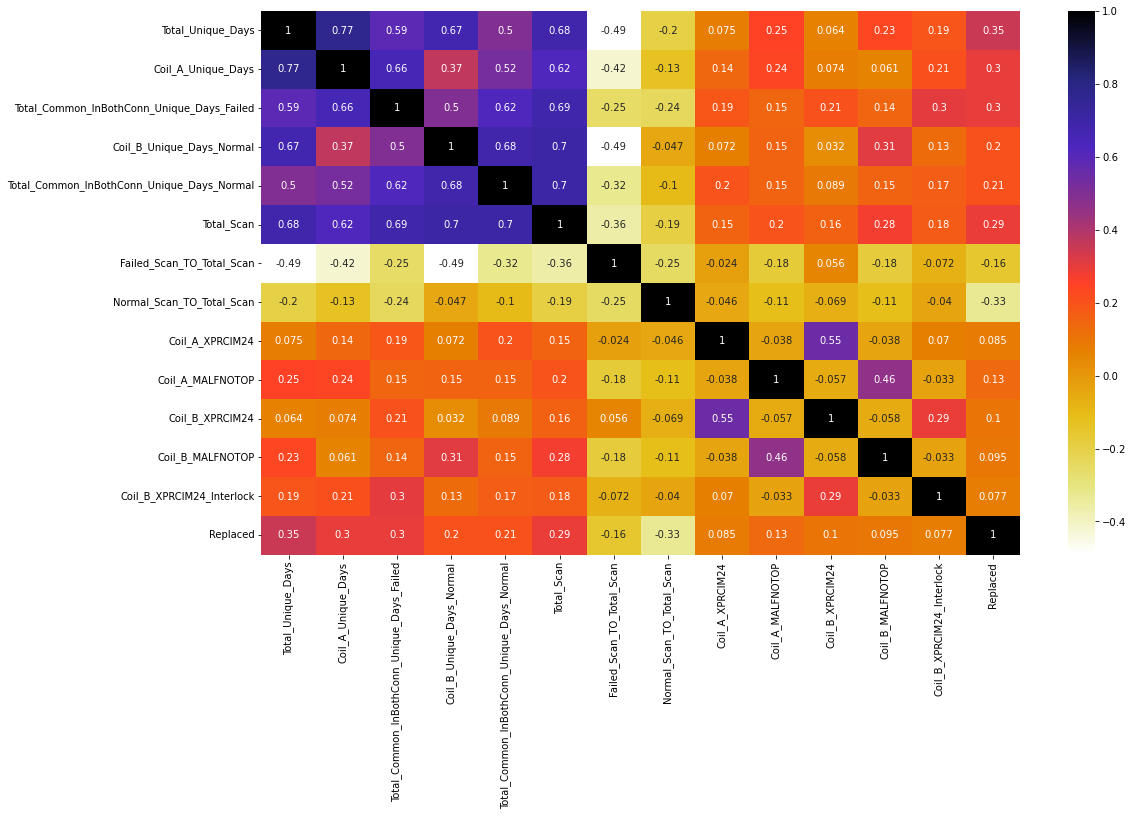

In [46]:
#again checking correlation

import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(17,10))
cor = df_6.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [47]:
abs(cor["Replaced"])

Total_Unique_Days                             0.351435
Coil_A_Unique_Days                            0.295766
Total_Common_InBothConn_Unique_Days_Failed    0.299810
Coil_B_Unique_Days_Normal                     0.204718
Total_Common_InBothConn_Unique_Days_Normal    0.206955
Total_Scan                                    0.292579
Failed_Scan_TO_Total_Scan                     0.155263
Normal_Scan_TO_Total_Scan                     0.333004
Coil_A_XPRCIM24                               0.085039
Coil_A_MALFNOTOP                              0.133700
Coil_B_XPRCIM24                               0.102676
Coil_B_MALFNOTOP                              0.094999
Coil_B_XPRCIM24_Interlock                     0.076856
Replaced                                      1.000000
Name: Replaced, dtype: float64

### 2. Selecting features using RFE

In [73]:
# importing libraries

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

In [74]:
vif_values = determine_VIF(df_5)
vif_values

,columns,VIF
0,Total_Unique_Days,302.339873
1,Coil_A_Unique_Days,115.614568
2,Coil_B_Unique_Days,158.542647
3,Coil_A_Unique_Days_Failed,inf
4,Coil_B_Unique_Days_Failed,inf
5,Total_Unique_Days_Failed,inf
6,Total_Common_InBothConn_Unique_Days_Failed,inf
7,Coil_A_Unique_Days_Normal,inf
8,Coil_B_Unique_Days_Normal,inf
9,Total_Unique_Days_Normal,inf


In [75]:
# making new datasets with important features

x = df_5.drop("Replaced" , axis = 1)
y = df_5.loc[:,"Replaced"]


In [76]:
# train and test
# train = 70% of total data
# test = 30% of total data

x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size = 0.3,random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(298, 45)
(129, 45)
(298,)
(129,)


In [77]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()      


In [78]:

select = RFE(clf_lr,n_features_to_select=15)
select.fit(x_train,y_train)
X_train_selected = select.transform(x_train)
X_test_selected = select.transform(x_test)


print("X_train.shape: {}".format(x_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train.shape: (298, 45)
X_train_selected.shape: (298, 15)


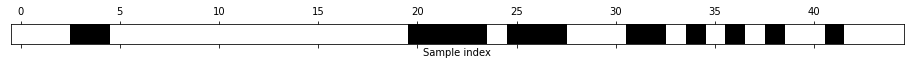

In [79]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())
plt.show()

In [80]:
mask

array([False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True, False,  True, False,
        True, False,  True, False, False,  True, False, False, False])

In [81]:
x_train.columns[mask]

Index(['Coil_A_Unique_Days_Failed', 'Coil_B_Unique_Days_Failed',
       'Failed_Scan_TO_Total_Scan', 'Normal_Scan_TO_Total_Scan',
       'Failed_Scan_TO_Normal_Scan', 'Coil_A_Interlock', 'Interlock',
       'Coil_A_3507', 'Coil_A_XPRCIM24', 'Coil_B_MALFNOTOP', '3507',
       'XPRCIM24', 'Coil_A_3507_Interlock', 'Coil_B_3508_Interlock',
       'Coil_3507_Interlock'],
      dtype='object')

In [83]:
x_train = X_train_selected
x_test = X_test_selected

### 3. Columns as per domain knowledge

In [101]:
x = df_5[['Coil_A_Unique_Days', 'Coil_B_Unique_Days','Total_Common_InBothConn_Unique_Days_Failed','Coil_A_Unique_Days_Normal', 'Coil_B_Unique_Days_Normal','Total_Common_InBothConn_Unique_Days_Normal', 'Total_Scan',
       'Coil_A_Total_Scan', 'Coil_B_Total_Scan', 'Coil_A_Errors','Coil_B_Errors','Coil_A_Normal',
       'Coil_B_Normal','Failed_Scan_TO_Total_Scan',
       'Normal_Scan_TO_Total_Scan', 'Failed_Scan_TO_Normal_Scan','Coil_B_Interlock', 'Interlock', 'Coil_A_3507',
       'Coil_A_XPRCIM24', 'Coil_A_MALFNOTOP', 'Coil_B_3508', 'Coil_B_XPRCIM24',
       'Coil_B_MALFNOTOP', '3507', '3508', 'XPRCIM24', 'MALFNOTOP',
       'Coil_A_3507_Interlock', 'Coil_A_MALFNOTOP_Interlock',
       'Coil_B_3508_Interlock', 'Coil_B_XPRCIM24_Interlock',
       'Coil_B_MALFNOTOP_Interlock', 'Coil_3507_Interlock',
       'Coil_3508_Interlock', 'Coil_XPRCIM24_Interlock',
       'Coil_MALFNOTOP_Interlock']]
y = df_5["Replaced"]

In [102]:
x.columns

Index(['Coil_A_Unique_Days', 'Coil_B_Unique_Days',
       'Total_Common_InBothConn_Unique_Days_Failed',
       'Coil_A_Unique_Days_Normal', 'Coil_B_Unique_Days_Normal',
       'Total_Common_InBothConn_Unique_Days_Normal', 'Total_Scan',
       'Coil_A_Total_Scan', 'Coil_B_Total_Scan', 'Coil_A_Errors',
       'Coil_B_Errors', 'Coil_A_Normal', 'Coil_B_Normal',
       'Failed_Scan_TO_Total_Scan', 'Normal_Scan_TO_Total_Scan',
       'Failed_Scan_TO_Normal_Scan', 'Coil_B_Interlock', 'Interlock',
       'Coil_A_3507', 'Coil_A_XPRCIM24', 'Coil_A_MALFNOTOP', 'Coil_B_3508',
       'Coil_B_XPRCIM24', 'Coil_B_MALFNOTOP', '3507', '3508', 'XPRCIM24',
       'MALFNOTOP', 'Coil_A_3507_Interlock', 'Coil_A_MALFNOTOP_Interlock',
       'Coil_B_3508_Interlock', 'Coil_B_XPRCIM24_Interlock',
       'Coil_B_MALFNOTOP_Interlock', 'Coil_3507_Interlock',
       'Coil_3508_Interlock', 'Coil_XPRCIM24_Interlock',
       'Coil_MALFNOTOP_Interlock'],
      dtype='object')

# 4. Model Building

In [60]:
# importing libraries

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

In [61]:
# making new datasets with important features

x = df_6.drop("Replaced" , axis = 1)
y = df_6.loc[:,"Replaced"]


In [103]:
# train and test
# train = 70% of total data
# test = 30% of total data

x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size = 0.3,random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(298, 37)
(129, 37)
(298,)
(129,)


In [63]:
# as there are multiple classifers option to choose and cross check accuraies in all but for the time being i am using 
# Knn clasifiers only to get accuracy.

### K-Nearest Neighbour

In [93]:
# lets check accuracy for different values of 'K'

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors = i )
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = accuracy_score(y_test , pred ,normalize = True)*float(100)
    print(' test accuracy for k = {0} is {1}' .format (i,acc))

 test accuracy for k = 1 is 66.66666666666666
 test accuracy for k = 3 is 65.89147286821705
 test accuracy for k = 5 is 68.9922480620155
 test accuracy for k = 7 is 68.21705426356588
 test accuracy for k = 9 is 69.76744186046511
 test accuracy for k = 11 is 71.31782945736434
 test accuracy for k = 13 is 71.31782945736434
 test accuracy for k = 15 is 71.31782945736434
 test accuracy for k = 17 is 71.31782945736434
 test accuracy for k = 19 is 69.76744186046511
 test accuracy for k = 21 is 69.76744186046511
 test accuracy for k = 23 is 69.76744186046511
 test accuracy for k = 25 is 68.9922480620155
 test accuracy for k = 27 is 71.31782945736434
 test accuracy for k = 29 is 71.31782945736434


test accuracy 71.31782945736434
f1_score of the model is 0.7701863354037267
precision of the model is 0.7848101265822784


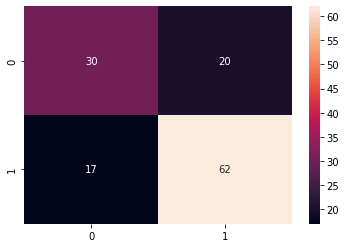

In [94]:
# analysing the error

knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train,y_train)
predict = knn.predict(x_test)
print('test accuracy',accuracy_score(y_test , predict ,normalize = True)*float(100))

knn_normal_accuracy = accuracy_score(y_test , predict ,normalize = True)*float(100)

# to plot confusion matrix

cm = confusion_matrix(y_test,predict)
sns.heatmap(cm , annot = True )

# calculation of F1 score

TN = cm[0,0]
TP = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

Recall = TP/(TP+FN)
Precision = TP/(TP+FP)

knn_normal_f1_score = ((2 * Recall * Precision)/(Recall + Precision))

print('f1_score of the model is {}'.format(knn_normal_f1_score))

print('precision of the model is {}'.format(Precision))

### LOGISTIC REGRESSION WITH GRID SEARCH CV

Best C Value is  {'C': 10}
test accuracy  68.21705426356588
f1_score of the model is 0.768361581920904
precision of the model is 0.8607594936708861


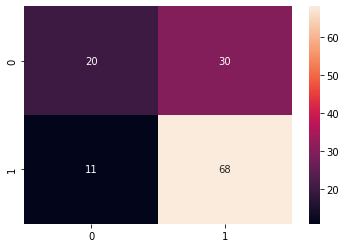

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lor = LogisticRegression(max_iter=1000)

params_lor = {'C':[0.00001,0.0001,0.001,0.1,1,10,100]}

lor_gcv = GridSearchCV(lor , param_grid = params_lor)

lor_gcv.fit(x_train, y_train)

print("Best C Value is ",lor_gcv.best_params_)

print("test accuracy ",(lor_gcv.score(x_test,y_test))*float(100))

logistic_regression_accuracy = lor_gcv.score(x_test,y_test)*float(100)

# to plot confusion matrix

cm = confusion_matrix(y_test,lor_gcv.predict(x_test))
sns.heatmap(cm , annot = True )


# calculation of F1 score

TN = cm[0,0]
TP = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

Recall = TP/(TP+FN)
Precision = TP/(TP+FP)

logistic_regression_f1_score = ((2 * Recall * Precision)/(Recall + Precision))

print('f1_score of the model is {}'.format(logistic_regression_f1_score))

print('precision of the model is {}'.format(Precision))

### RANDOM FOREST WITH RANDOMIZED SEARCH CV

Best n_estimators Value is  {'n_estimators': 41}
test accuracy  68.9922480620155
f1_score of the model is 0.7468354430379747
precision of the model is 0.7468354430379747


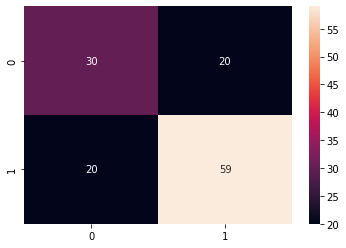

In [104]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

params_rf = {'n_estimators' : np.arange(1,100,10) }

rf_gcv = RandomizedSearchCV(rf , param_distributions = params_rf)

rf_gcv.fit(x_train,y_train)

print("Best n_estimators Value is ",rf_gcv.best_params_)


print("test accuracy ",(rf_gcv.score(x_test,y_test))*float(100))

random_forest_accuracy = rf_gcv.score(x_test,y_test)*float(100)

# to plot confusion matrix

cm = confusion_matrix(y_test,rf_gcv.predict(x_test))
sns.heatmap(cm , annot = True )


# calculation of F1 score

TN = cm[0,0]
TP = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

Recall = TP/(TP+FN)
Precision = TP/(TP+FP)

random_forest_f1_score = ((2 * Recall * Precision)/(Recall + Precision))

print('f1_score of the model is {}'.format(random_forest_f1_score))

print('precision of the model is {}'.format(Precision))

Best parameters values are  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 41}
test accuracy  66.66666666666666
f1_score of the model is 0.7393939393939394
precision of the model is 0.7721518987341772


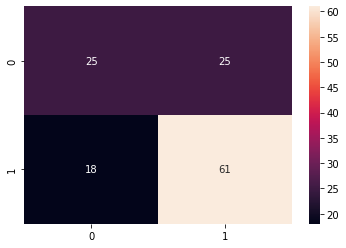

In [97]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

params_xgb = {'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':np.arange(1,50,10),'max_depth':np.arange(1,10)}

xgb_gcv = GridSearchCV(xgb , param_grid = params_xgb)

xgb_gcv.fit(x_train,y_train)

print("Best parameters values are ",xgb_gcv.best_params_)


print("test accuracy ",(xgb_gcv.score(x_test,y_test))*float(100))

xgb_accuracy = xgb_gcv.score(x_test,y_test)*float(100)

# to plot confusion matrix

cm = confusion_matrix(y_test,xgb_gcv.predict(x_test))
sns.heatmap(cm , annot = True )


# calculation of F1 score

TN = cm[0,0]
TP = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

Recall = TP/(TP+FN)
Precision = TP/(TP+FP)

random_forest_f1_score = ((2 * Recall * Precision)/(Recall + Precision))

print('f1_score of the model is {}'.format(random_forest_f1_score))

print('precision of the model is {}'.format(Precision))

# Stacking Classifier

test accuracy  61.240310077519375
f1_score of the model is 0.6987951807228916
precision of the model is 0.7341772151898734


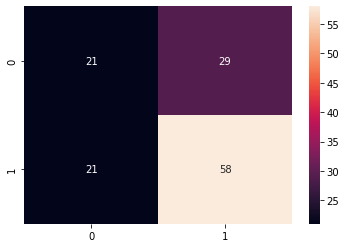

In [69]:
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=11, random_state=42)),('lr', XGBClassifier(random_state=42))]
clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())

clf.fit(x_train, y_train)
    


print("test accuracy ",(clf.score(x_test,y_test))*float(100))

clf_accuracy = clf.score(x_test,y_test)*float(100)

# to plot confusion matrix

cm = confusion_matrix(y_test,clf.predict(x_test))
sns.heatmap(cm , annot = True )


# calculation of F1 score

TN = cm[0,0]
TP = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

Recall = TP/(TP+FN)
Precision = TP/(TP+FP)

random_forest_f1_score = ((2 * Recall * Precision)/(Recall + Precision))

print('f1_score of the model is {}'.format(random_forest_f1_score))

print('precision of the model is {}'.format(Precision))

In [105]:
import pickle
with open('knn_feature1.pkl', 'wb') as files:
    pickle.dump(rf_gcv, files)